# Result Cache Operator

- Result cache is a memory are in SGA to store the results of queries for some time to increase the performance

- There are two ways to store results in result cache
    - Manual 
    - Force 

- DBMS_RESULT_CACHE package has statistics, information and some memory managing abilities
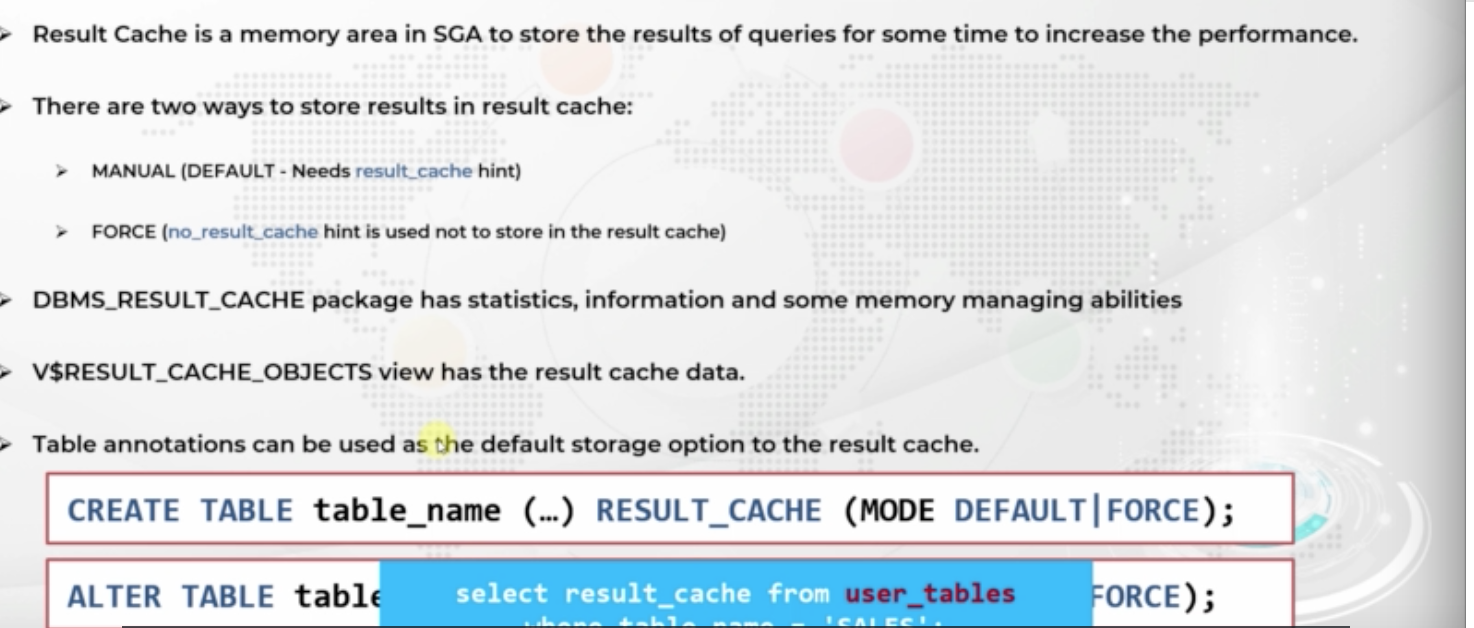

```sql
EXEC DBMS_RESULT_CACHE.FLUSH;
 
SELECT * FROM V$RESULT_CACHE_OBJECTS;
 
SELECT cust_id, AVG(amount_sold) FROM sales
GROUP BY cust_id
order by cust_id;
 
SELECT /*+ RESULT_CACHE */ cust_id, AVG(amount_sold) FROM sales
GROUP BY cust_id
order by cust_id;
 
SELECT /*+ RESULT_CACHE */ cust_id, MIN(amount_sold), AVG(amount_sold) FROM sales
GROUP BY cust_id
order by cust_id;
 
SELECT * FROM V$RESULT_CACHE_OBJECTS;
 
select result_cache from user_tables where table_name = 'SALES';
 
ALTER TABLE SALES RESULT_CACHE (MODE FORCE);
 
SELECT cust_id, MAX(amount_sold) FROM sales
GROUP BY cust_id
order by cust_id;
 
ALTER TABLE SALES RESULT_CACHE (MODE DEFAULT);
``` 

# View Operator

- Every View operator in the operations area does not mean that a view is there in the query
- Each seperate query in a query is pretended as an inline view


```sql
ELECT e.first_name, e.last_name, dept_locs_v.street_address,
       dept_locs_v.postal_code
FROM   employees e,
      ( SELECT d.department_id, d.department_name, 
               l.street_address, l.postal_code
        FROM   departments d, locations l
        WHERE  d.location_id = l.location_id ) dept_locs_v
WHERE  dept_locs_v.department_id = e.department_id
AND    e.last_name = 'Smith';
 
 
select e.first_name, e.last_name, l.street_address, l.postal_code
from employees e, departments d, locations l
where d.location_id = l.location_id
and d.department_id = e.department_id
and e.last_name = 'Smith';
 
 
SELECT e.first_name, e.last_name, dept_locs_v.street_address,
       dept_locs_v.postal_code
FROM   employees e,
      ( SELECT /*+ NO_MERGE */ d.department_id, d.department_name, 
               l.street_address, l.postal_code
        FROM   departments d, locations l
        WHERE  d.location_id = l.location_id ) dept_locs_v
WHERE  dept_locs_v.department_id = e.department_id
AND    e.last_name = 'Smith';
 
 
select v.*,d.department_name from (select department_id, sum(salary) SUM_SAL
from employees group by department_id) v, departments d 
where v.department_id=d.department_id;
 
 
create view v as select department_id, salary from employees;
 
select department_id, salary from v;
 
drop view v;
 
create view v as select /*+ NO_MERGE */ department_id, salary from employees;
 
select department_id, salary from v;
 
select department_id, salary from (select /*+ NO_MERGE */ department_id, salary from employees);
 
select department_id, salary from employees;
 
drop view v;
 
select * from ALL_TAB_MODIFICATIONS;
``` 

# Cluster

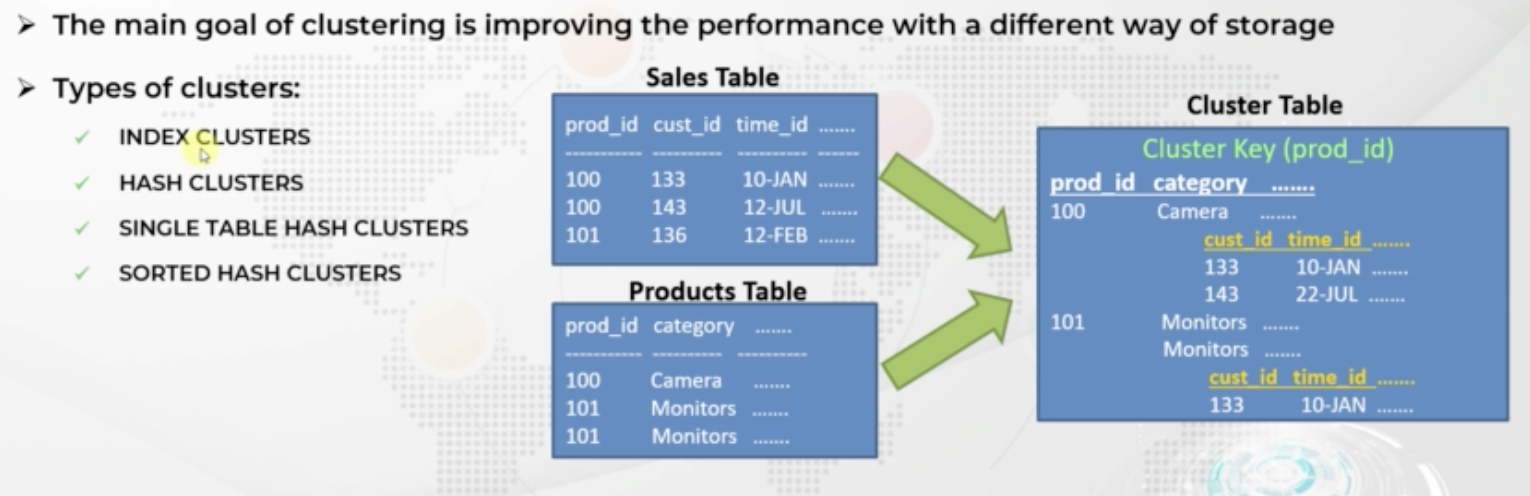

```sql
CREATE CLUSTER emp_dep_cluster (dep_id NUMBER(4,0))
    TABLESPACE users
    STORAGE (INITIAL 250K     NEXT 50K )
    HASH IS dep_id HASHKEYS 500;
 
create table emps_clustered (
    employee_id number(6,0) primary key,
    first_name varchar2(20),
    last_name varchar2(25),
    department_id number(4,0)
) cluster emp_dep_cluster (department_id);
 
insert into emps_clustered (employee_id,first_name,last_name,department_id)
select employee_id,first_name,last_name,department_id from employees;
 
create table deps_clustered (
    department_id number(4,0) primary key,
    department_name varchar2(30)
) cluster emp_dep_cluster (department_id);
 
insert into deps_clustered (department_id,department_name)
select department_id,department_name from departments;
 
select employee_id,first_name,department_name from employees e, departments d
where e.department_id = d.department_id
and e.department_id = 80;
 
select employee_id,first_name,department_name from emps_clustered e, deps_clustered d
where e.department_id = d.department_id
and e.department_id = 80;
 
select employee_id,first_name,department_name from emps_clustered e, deps_clustered d
where e.department_id = d.department_id
and e.department_id > 80;
 
select employee_id,first_name,department_name from employees e, departments d
where e.department_id = d.department_id
and e.department_id > 80;
 
select * from emps_clustered;
 
drop table deps_clustered;
drop table emps_clustered;
drop cluster emp_dep_cluster;
``` 

# Sort Operator

- Sort Aggregate 
- Sort Unique
- Sort Join
- Sort Group By
- Sort  Order BY
- Hash Grooup By
- Hash Unique Operator
- Buffer Sort Operator

```sql
select distinct prod_id, cust_id from sales;
 
select distinct prod_id, cust_id from sales order by prod_id;
 
select prod_id, cust_id, sum(amount_sold) from sales
group by prod_id,cust_id;
 
select prod_id, cust_id, sum(amount_sold) from sales
group by prod_id,cust_id
order by prod_id;
 
select prod_id, cust_first_name, amount_sold from sales, customers
``` 

# Inlist Ops

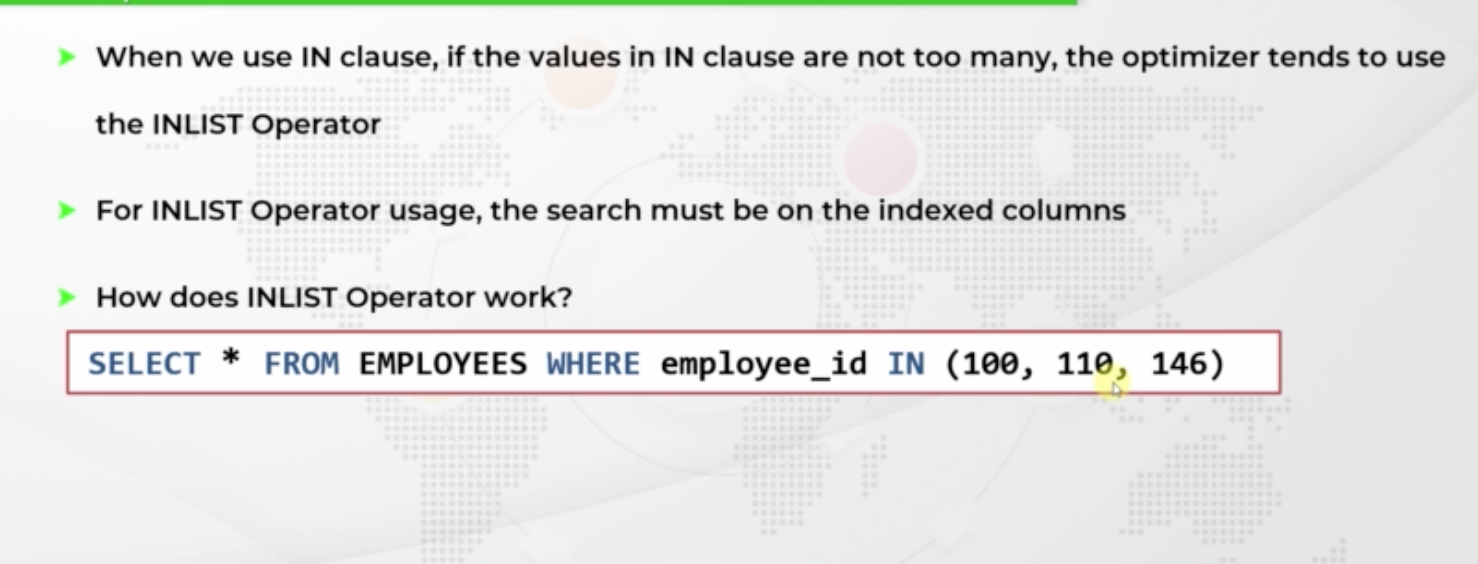

```sql
select * from employees where employee_id in (100, 110, 146);
 
select * from employees where employee_id in (100, 110, 146, 103, 124, 132, 102,
                                              156, 187, 203, 177, 108, 123, 163,
                                              104, 105, 188, 142, 151, 129, 109,
                                              200, 130, 116, 104, 174, 152, 122,
                                              155, 181, 133, 127, 158, 193, 140,
                                              101, 119, 183, 152, 150, 119, 139);
 
select * from employees where employee_id = 100 or
                              employee_id = 110 or 
                              employee_id = 146;
``` 

```sql
select * from employees where rownum < 11;
 
select * from employees where rownum < 11 order by employee_id desc;
 
select * from employees fetch first 10 rows only;
``` 

```sql
select min(employee_id) from employees where employee_id < 140;
 
select max(employee_id) from employees where employee_id < 140;
 
select min(employee_id) from employees;
 
select min(employee_id), max(employee_id) from employees where employee_id < 140;
 
select min(commission_pct) from employees where commission_pct < 0.1;
``` 

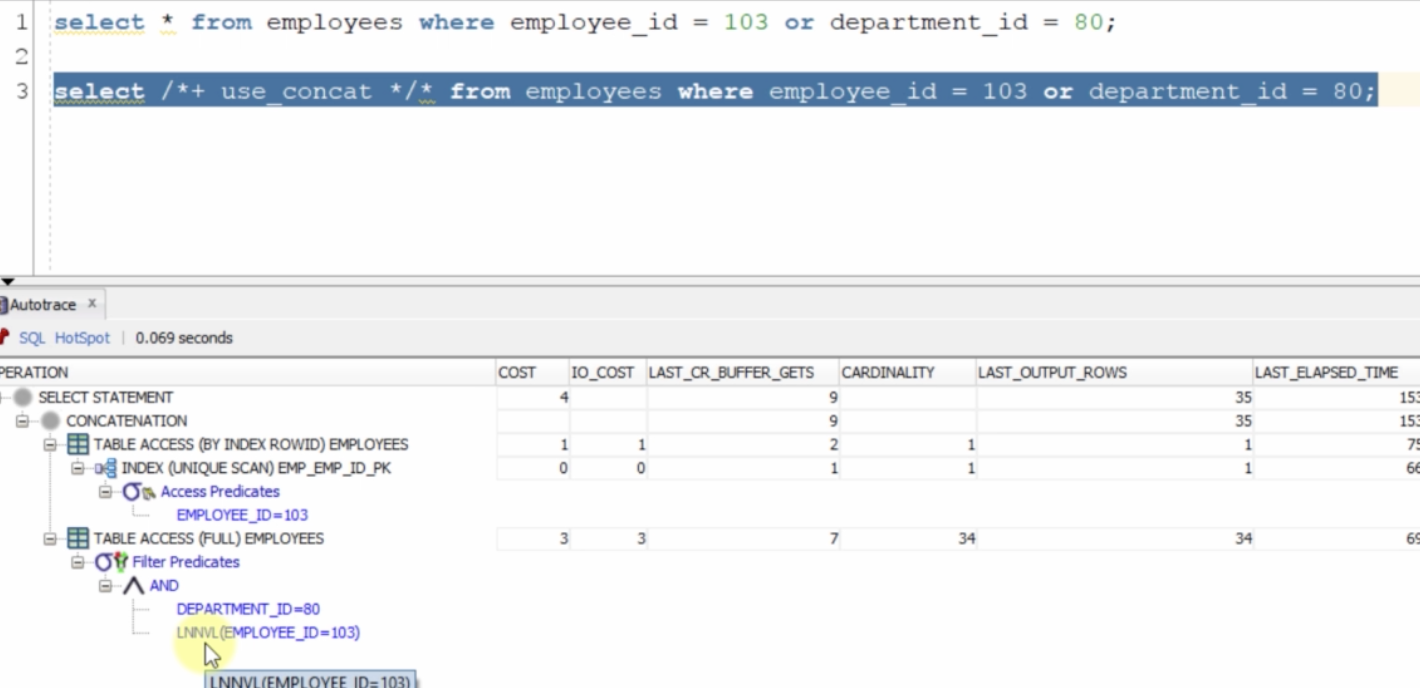

LNNVM : to block duplicates

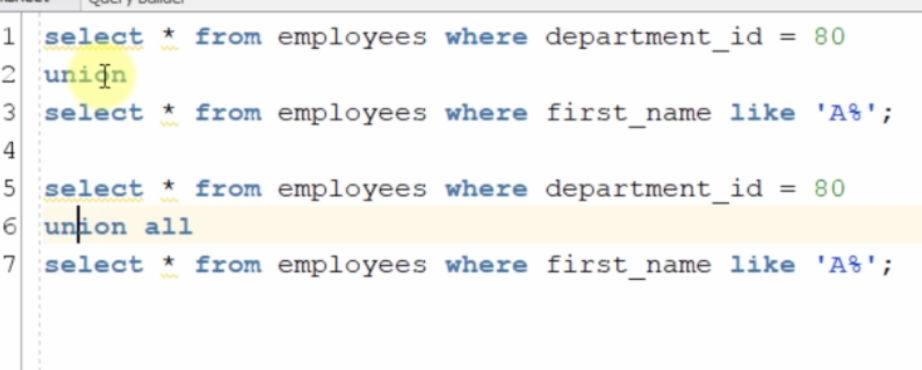

union all is more cheaper than union

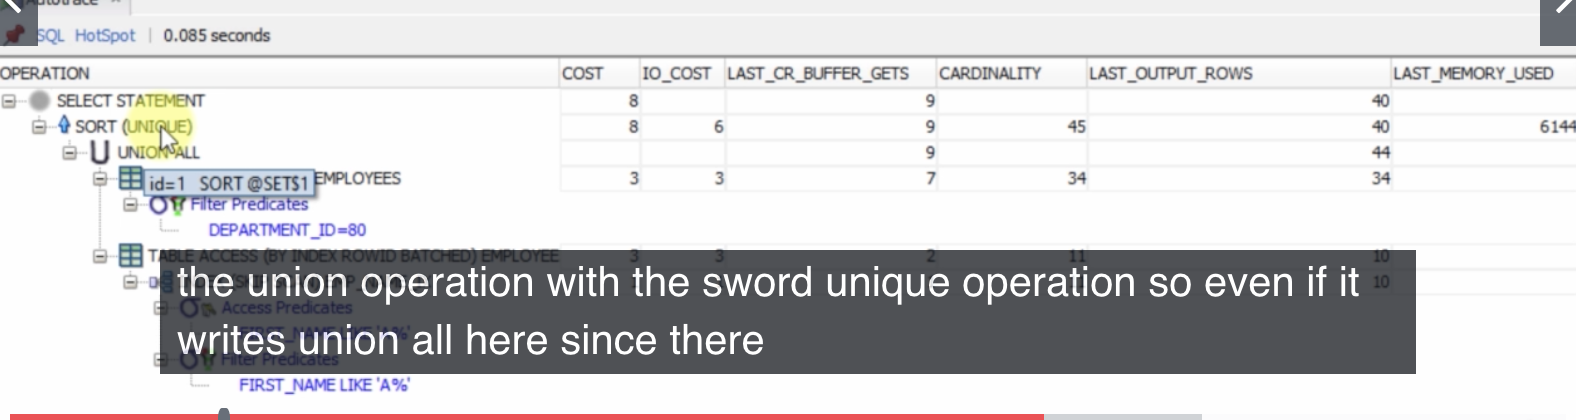

```sql
select * from employees where department_id = 80
union
select * from employees where first_name like 'A%';
 
select * from employees where department_id = 80
union all
select * from employees where first_name like 'A%';
``` 

# Intersect Operator

```sql
SELECT * FROM employees WHERE department_id = 80
INTERSECT
SELECT * FROM employees WHERE first_name LIKE 'A%';
 
SELECT * FROM employees where employee_id between 145 and 179
INTERSECT
SELECT * FROM employees WHERE first_name LIKE 'A%';
 
SELECT employee_id FROM employees where employee_id between 145 and 179
INTERSECT
SELECT employee_id FROM employees WHERE first_name LIKE 'A%';
 
SELECT employee_id FROM employees e where employee_id between 145 and 179
and exists
````
 

# Minus Operator

# How to find a performance problems

- poorly written query
- index used or not used
- there is no index
- predicates are not used
- wrong join order

- Make the statistics up to date
- Use dynamic statistics
- Create or modify indexes
- rewrite the query to use an index
- Use hints
- remove wrong hints
- change the hints
- eliminate implicit data type conversion
- Create function-based indexes
- use index-organized table
- change the optimizer mode
- use paraller execution
- modify or disable triggers and constraints
-

# Ways of getting the execution plan & statistics

- 4 major tools to get the execution plan
    - Autotrace
    - SQL Monitor
    - TKPROF
    - DBMS_XPLAN
    
- Autotrace
    - Free
    - We can compare two different execution plans and statistics with SLQ dev
    - SQL developer has a hotstop button which shows the problematic are of the plan
    - We can export a plan and use it later
    - By default, SQL developer autotrace doesn't read the all of the rows
    
- SQL Monitoring
    - it shows the execution plan and the statistics of the query being used right now
    - 
    
- TKPROF
    - Converts oracle trace files into a human readable format
    - We need to create a trace file first, and use TKPROF tool for this trace file
    - USing TKPROF needs a bit more work to do comparing to the others
    - You need to have the access priviledge to the database server to use thi
    - it includes all the SQL statements run btween the tracing starts and ends
    - It breaks down the execution time into parse, execute and fetch times
    
- DBMC\_XPLAM
    - easy
    - cache


# Using Real time SQL monitoring tool


- benefits?
    - Shows the execution in real time with lots of details
    - tracks all the running queries, which enables us to find the top consuming queries
    - we can create active reports of the running queries which lets us analyze offline
    - monitors the parallel execution
    - helps to analyze the large plans and comlex queries easier
    - we can utilize poorly used indexes
    